In [28]:
import pandas as pd

data = pd.read_csv('chemical_dataset.csv')


In [29]:
data = pd.DataFrame(data)
data.head()

,Molecular_Weight,Num_Hydrogen_Donors,Num_Rotatable_Bonds,Num_Aromatic_Rings,Bioactivity
0,319.525402,1,9,1,0.864058
1,386.075747,4,4,2,0.590573
2,341.105350,2,2,0,0.969911
3,317.953273,4,1,2,0.987085
4,269.461920,4,6,1,0.185182


Epoch 1/100
15/25 [=================>............] - ETA: 0s - loss: 0.1831 
Epoch 1: val_loss improved from inf to 0.08855, saving model to best_model.h5
25/25 [==============================] - 1s 21ms/step - loss: 0.1594 - val_loss: 0.0886
Epoch 2/100
14/25 [===============>..............] - ETA: 0s - loss: 0.1157
Epoch 2: val_loss improved from 0.08855 to 0.08561, saving model to best_model.h5
25/25 [==============================] - 0s 10ms/step - loss: 0.1125 - val_loss: 0.0856
Epoch 3/100
18/25 [====================>.........] - ETA: 0s - loss: 0.1042
Epoch 3: val_loss improved from 0.08561 to 0.08451, saving model to best_model.h5
25/25 [==============================] - 0s 10ms/step - loss: 0.1046 - val_loss: 0.0845
Epoch 4/100
20/25 [=======================>......] - ETA: 0s - loss: 0.0972
Epoch 4: val_loss improved from 0.08451 to 0.08366, saving model to best_model.h5
25/25 [==============================] - 0s 12ms/step - loss: 0.0979 - val_loss: 0.0837
Epoch 5/100
17/25 [

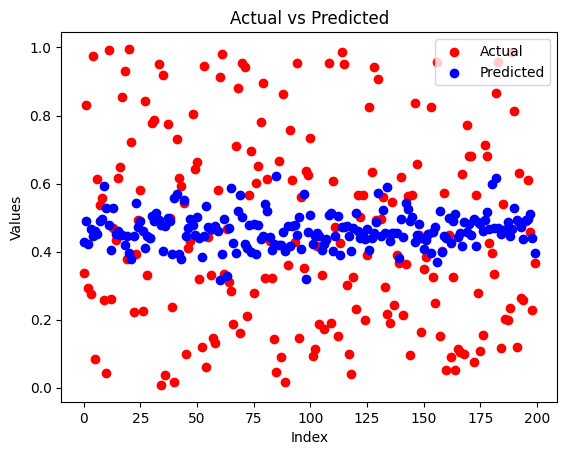

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import datetime

X = data[['Molecular_Weight', 'Num_Hydrogen_Donors', 'Num_Rotatable_Bonds', 'Num_Aromatic_Rings']]
y = data['Bioactivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, 
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, checkpoint, tensorboard])

model.load_weights('best_model.h5')

loss = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)

y_pred = model.predict(X_test_scaled).flatten()

plt.scatter(range(len(y_test)), y_test, color='r', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='b', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 0.8104 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.69316, saving model to best_model.h5
25/25 [==============================] - 2s 37ms/step - loss: 0.8098 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.7610 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.69316 to 0.69162, saving model to best_model.h5
25/25 [==============================] - 0s 16ms/step - loss: 0.7610 - accuracy: 0.0000e+00 - val_loss: 0.6916 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 0.7529 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 0.69162
25/25 [==============================] - 0s 14ms/step - loss: 0.7529 - accuracy: 0.0000e+00 - val_loss: 0.6919 - val_accuracy: 0.0000e+00
Epoch 4/100
20/25 [=======================>......] - ETA: 0s - loss: 0.7519 - accu

Text(0.5, 1.0, 'Actual vs Predicted')

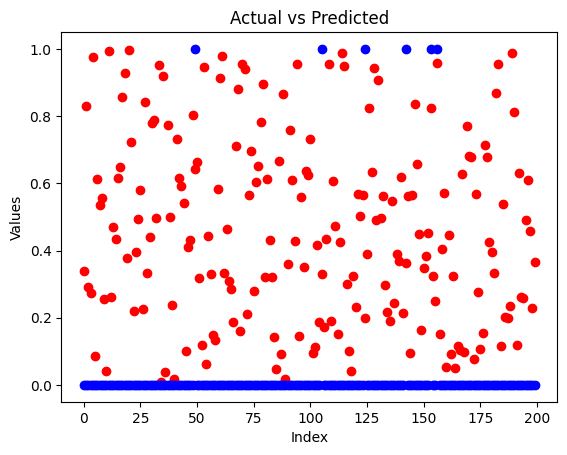

In [53]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

X = data[['Molecular_Weight', 'Num_Hydrogen_Donors', 'Num_Rotatable_Bonds', 'Num_Aromatic_Rings']]
X = X.values.reshape(-1, 2, 2, 1)  # Reshape to 2D images with 1 channel
y = data['Bioactivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 4)).reshape(-1, 2, 2, 1)
X_test_scaled = scaler.transform(X_test.reshape(-1, 4)).reshape(-1, 2, 2, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(2, 2, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))  # Updated input shape
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, checkpoint, tensorboard])

model.load_weights('best_model.h5')

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

plt.scatter(range(len(y_test)), y_test, color='r', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='b', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')

Epoch 1/100
16/25 [==================>...........] - ETA: 0s - loss: 0.7055 - accuracy: 0.0000e+00 
Epoch 1: val_loss improved from inf to 0.69366, saving model to best_model.h5
25/25 [==============================] - 1s 19ms/step - loss: 0.7055 - accuracy: 0.0000e+00 - val_loss: 0.6937 - val_accuracy: 0.0000e+00
Epoch 2/100
23/25 [==========================>...] - ETA: 0s - loss: 0.7063 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.69366 to 0.69329, saving model to best_model.h5
25/25 [==============================] - 0s 10ms/step - loss: 0.7075 - accuracy: 0.0000e+00 - val_loss: 0.6933 - val_accuracy: 0.0000e+00
Epoch 3/100
17/25 [===================>..........] - ETA: 0s - loss: 0.6989 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 0.69329
25/25 [==============================] - 0s 7ms/step - loss: 0.6994 - accuracy: 0.0000e+00 - val_loss: 0.6953 - val_accuracy: 0.0000e+00
Epoch 4/100
21/25 [========================>.....] - ETA: 0s - loss: 0.7029 - accu

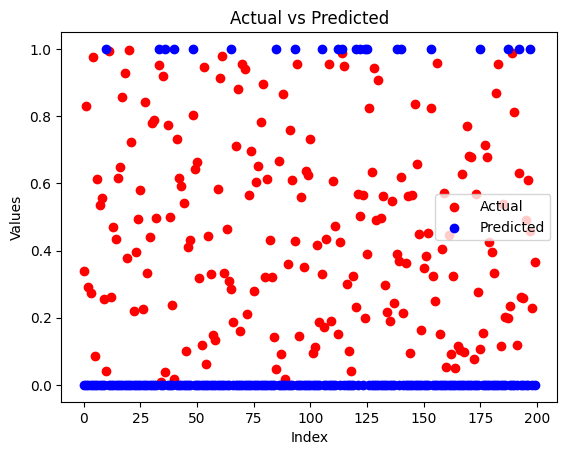

In [54]:
X = data[['Molecular_Weight', 'Num_Hydrogen_Donors', 'Num_Rotatable_Bonds', 'Num_Aromatic_Rings']]
y = data['Bioactivity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint, tensorboard])

model.load_weights('best_model.h5')

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

y_pred_prob = model.predict(X_test).flatten()
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

plt.scatter(range(len(y_test)), y_test, color='r', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='b', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

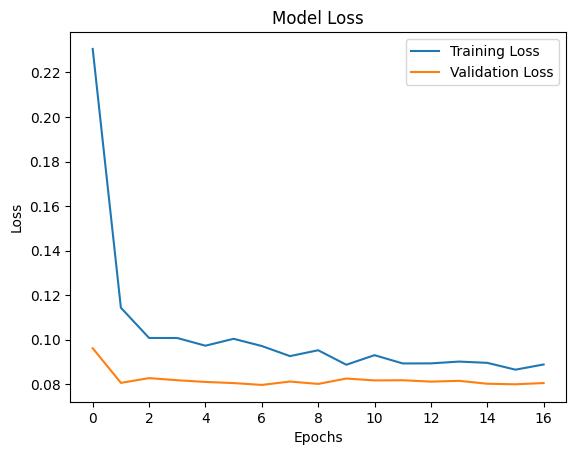

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/200
25/25 [==============================] - 1s 13ms/step - loss: 0.7011 - accuracy: 0.5075 - val_loss: 0.6888 - val_accuracy: 0.5250
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5263 - val_loss: 0.6962 - val_accuracy: 0.5350
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5562 - val_loss: 0.6954 - val_accuracy: 0.5400
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6818 - accuracy: 0.5925 - val_loss: 0.7006 - val_accuracy: 0.5450
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5387 - val_loss: 0.7018 - val_accuracy: 0.5450
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5487 - val_loss: 0.6985 - val_accuracy: 0.5550
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5437 - val_loss: 0.7048 - val_accuracy: 0.5200
Epoch 8/200


Epoch 59/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.6162 - val_loss: 0.7336 - val_accuracy: 0.5000
Epoch 60/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6187 - val_loss: 0.7384 - val_accuracy: 0.5050
Epoch 61/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.5888 - val_loss: 0.7324 - val_accuracy: 0.4900
Epoch 62/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6237 - val_loss: 0.7403 - val_accuracy: 0.4800
Epoch 63/200
25/25 [==============================] - 0s 8ms/step - loss: 0.6642 - accuracy: 0.5850 - val_loss: 0.7363 - val_accuracy: 0.4850
Epoch 64/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6498 - accuracy: 0.6275 - val_loss: 0.7362 - val_accuracy: 0.4850
Epoch 65/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.6275 - val_loss: 0.7443 - val_accuracy: 0.4800
Epoch 

25/25 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6325 - val_loss: 0.7696 - val_accuracy: 0.4800
Epoch 117/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6310 - accuracy: 0.6263 - val_loss: 0.7656 - val_accuracy: 0.4850
Epoch 118/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6321 - accuracy: 0.6425 - val_loss: 0.7702 - val_accuracy: 0.4900
Epoch 119/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6350 - val_loss: 0.7764 - val_accuracy: 0.4850
Epoch 120/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6150 - val_loss: 0.7782 - val_accuracy: 0.4950
Epoch 121/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6309 - accuracy: 0.6325 - val_loss: 0.7725 - val_accuracy: 0.4850
Epoch 122/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6231 - accuracy: 0.6550 - val_loss: 0.7785 - val_accuracy: 0.4900
Epoch 123/200

25/25 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6513 - val_loss: 0.8143 - val_accuracy: 0.4900
Epoch 174/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.6550 - val_loss: 0.8090 - val_accuracy: 0.4700
Epoch 175/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6063 - accuracy: 0.6600 - val_loss: 0.8007 - val_accuracy: 0.4950
Epoch 176/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6108 - accuracy: 0.6562 - val_loss: 0.8029 - val_accuracy: 0.4850
Epoch 177/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.6338 - val_loss: 0.8057 - val_accuracy: 0.4800
Epoch 178/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6625 - val_loss: 0.8141 - val_accuracy: 0.4750
Epoch 179/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.6612 - val_loss: 0.8094 - val_accuracy: 0.4900
Epoch 180/200

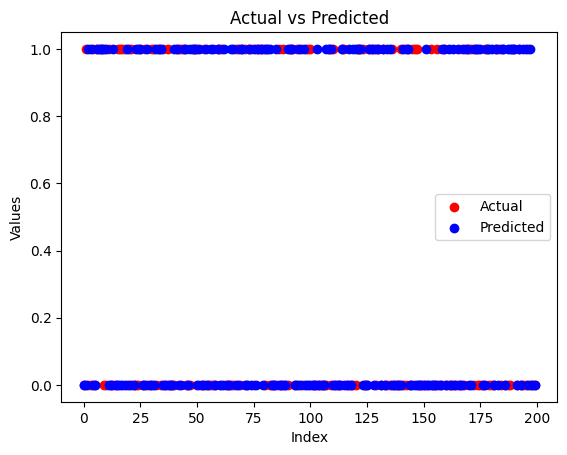

In [32]:
y = np.where(y >= 0.5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

plt.scatter(range(len(y_test)), y_test, color='r', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='b', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6952 - accuracy: 0.4975 - val_loss: 0.6950 - val_accuracy: 0.5150
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5163 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5200 - val_loss: 0.6985 - val_accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6851 - accuracy: 0.5350 - val_loss: 0.7101 - val_accuracy: 0.5100
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5437 - val_loss: 0.7035 - val_accuracy: 0.5100
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5625 - val_loss: 0.7089 - val_accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.5688 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6100 - val_loss: 0.7394 - val_accuracy: 0.4850
Epoch 60/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.6225 - val_loss: 0.7413 - val_accuracy: 0.4800
Epoch 61/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.5975 - val_loss: 0.7414 - val_accuracy: 0.4850
Epoch 62/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.5888 - val_loss: 0.7399 - val_accuracy: 0.4750
Epoch 63/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6187 - val_loss: 0.7427 - val_accuracy: 0.4700
Epoch 64/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.6250 - val_loss: 0.7471 - val_accuracy: 0.4800
Epoch 65/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6112 - val_loss: 0.7447 - val_accuracy: 0.4950
Epoch 

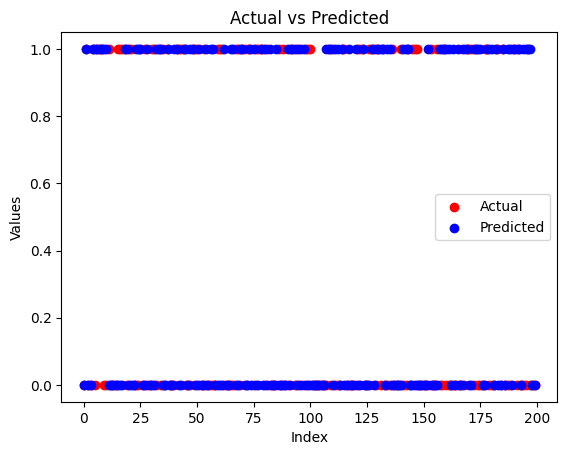

In [33]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_scaled, y_test))


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)


plt.scatter(range(len(y_test)), y_test, color='r', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='b', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
